# Portfolio Project 1 - Indonesia AI - Reinaldo NLP4B

This is a sentiment analysis project using a sample of Twitter's data on Indonesian General Election 2019, carried out with @Roby Koeswojo, @Rijal Abdulhakim, @Satriavi Dananjaya, @Muhammad Yatsrib.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tweet.csv').drop(columns = ['Unnamed: 0'], axis = 1)
df.head(10)

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
5,netral,"Yg bisikin pak jokowi, cm mikirin perputaran d..."
6,positif,Masa tenang msih ngoceh aja..ttp jokowi harga ...
7,positif,#UASdifitnahKejiBalasDiTPS kerjasa ekonomi b...
8,netral,"Iya bener Aa, kita MANTAP kan pilihan ke Pemim..."
9,negatif,Prabowo-Sandi Sepakat Tak Ambil Gaji karena Ne...


### Tweet Deconstruction

In [2]:
df['hashtags'] = df['tweet'].str.extractall(r'(#\w+)').unstack().apply(lambda x: ' '.join(x.dropna()), axis=1)
df['mentions'] = df['tweet'].str.extractall(r'(@\w+)').unstack().apply(lambda x: ' '.join(x.dropna()), axis=1)
df['negations'] = df['tweet'].str.extractall(r'(tapi|tetapi|namun|enggak|tidak|\sgak\s|tp|gak\s|\sga|\sga\s|tdk\s|\stdk\s)').unstack().apply(lambda x: ' '.join(x.dropna()), axis=1)
df['links'] = df['tweet'].str.extractall(r'(https?:\/\/\S+)').unstack().apply(lambda x: ' '.join(x.dropna()), axis=1)
df['emojis'] = df['tweet'].str.extractall(r'([^\x00-\x7F]+)').unstack().apply(lambda x: ' '.join(x.dropna()), axis=1)
df.head(20)

,sentimen,tweet,hashtags,mentions,negations,links,emojis
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,NaN,@prabowo @rockygerung,tidak tp,https://twitter.com/mediaindonesia/status/1117...,ðŸ‘‡ ðŸ˜œ Â â€¦
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",NaN,NaN,tp,http://dlvr.it/R2pvZVÂ,Â
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",#01IndonesiaMaju #JokowiLagi #JokowiMenangTota...,NaN,NaN,NaN,NaN
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",NaN,NaN,NaN,NaN,NaN
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,NaN,NaN,NaN,NaN,NaN
5,netral,"Yg bisikin pak jokowi, cm mikirin perputaran d...",NaN,NaN,tp,NaN,NaN
6,positif,Masa tenang msih ngoceh aja..ttp jokowi harga ...,NaN,NaN,tp,NaN,NaN
7,positif,#UASdifitnahKejiBalasDiTPS kerjasa ekonomi b...,#UASdifitnahKejiBalasDiTPS #UASdifitnahKejiBal...,NaN,NaN,NaN,NaN
8,netral,"Iya bener Aa, kita MANTAP kan pilihan ke Pemim...",NaN,@jokowi @SBYudhoyono,NaN,NaN,ðŸ˜‚ ðŸ™ðŸ‘
9,negatif,Prabowo-Sandi Sepakat Tak Ambil Gaji karena Ne...,#GoAceh,NaN,tp,https://www.goaceh.co/artikel/serbaserbi/2019/...,Â â€¦


### Tweet Initial Analysis

In [3]:
print(df.shape)
a = df[['sentimen', 'tweet']].groupby(['sentimen']).count().sort_values('tweet', ascending=False)

b = df[['sentimen', 'tweet']].query('tweet.str.contains("jokowi", case = False) \
                                    & ~tweet.str.contains("prabowo", case = False)') \
                                        .groupby('sentimen').count()\
                                                .rename(columns={'tweet': 'jokowi & ~prabowo'})

c = df[['sentimen', 'tweet']].query('tweet.str.contains("prabowo", case = False) \
                                    & ~tweet.str.contains("jokowi", case = False)') \
                                        .groupby('sentimen').count() \
                                                .rename(columns={'tweet': 'prabowo & ~jokowi'})

d = df[['sentimen', 'tweet']].query('tweet.str.contains("prabowo", case = False) \
                                    & tweet.str.contains("jokowi", case = False)') \
                                        .groupby('sentimen').count() \
                                                .rename(columns={'tweet': 'jokowi & prabowo'})

e = df[['sentimen', 'tweet']].query('~tweet.str.contains("prabowo", case = False) \
                                    & ~tweet.str.contains("jokowi", case = False)') \
                                        .groupby('sentimen').count() \
                                                .rename(columns={'tweet': '~prabowo & ~jokowi'})

f = pd.concat([a, b, c, d, e], axis=1)

g = pd.DataFrame({'total': [f['tweet'].sum(), f['jokowi & ~prabowo'].sum(), f['prabowo & ~jokowi'].sum(), f['jokowi & prabowo'].sum(), f['~prabowo & ~jokowi'].sum()]}, index=['tweet', 'jokowi & ~prabowo', 'prabowo & ~jokowi', 'jokowi & prabowo', '~prabowo & ~jokowi']).T

h = pd.concat([f, g], axis = 0)

h

(1815, 7)


,tweet,jokowi & ~prabowo,prabowo & ~jokowi,jokowi & prabowo,~prabowo & ~jokowi
positif,612,219,250,54,89
netral,607,205,211,98,93
negatif,596,162,168,71,195
total,1815,586,629,223,377


The four categories of "jokowi & ~prabowo", "prabowo & ~jokowi", "prabowo & jokowi", and "~prabowo & ~jokowi" are initial points to further interrogate the data later on. For now, the data is quite balanced, with notes on `prabowo & ~jokowi` negatif and `~prabowo & ~jokowi`.

Let's tag the index with these categories.

In [4]:
idxb = df[['sentimen', 'tweet']].query('tweet.str.contains("jokowi", case = False) \
                                       & ~tweet.str.contains("prabowo", case = False)').index
idxc = df[['sentimen', 'tweet']].query('tweet.str.contains("prabowo", case = False) \
                                        & ~tweet.str.contains("jokowi", case = False)').index
idxd = df[['sentimen', 'tweet']].query('tweet.str.contains("prabowo", case = False) \
                                        & tweet.str.contains("jokowi", case = False)').index
idxe = df[['sentimen', 'tweet']].query('~tweet.str.contains("prabowo", case = False) \
                                        & ~tweet.str.contains("jokowi", case = False)').index

df.loc[idxb, '[INCLUDE]'] = 'jokowi & ~prabowo'
df.loc[idxc, '[INCLUDE]'] = 'prabowo & ~jokowi'
df.loc[idxd, '[INCLUDE]'] = 'jokowi & prabowo'
df.loc[idxe, '[INCLUDE]'] = '~prabowo & ~jokowi'
df.head(5)

,sentimen,tweet,hashtags,mentions,negations,links,emojis,[INCLUDE]
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,NaN,@prabowo @rockygerung,tidak tp,https://twitter.com/mediaindonesia/status/1117...,ðŸ‘‡ ðŸ˜œ Â â€¦,prabowo & ~jokowi
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",NaN,NaN,tp,http://dlvr.it/R2pvZVÂ,Â,jokowi & ~prabowo
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",#01IndonesiaMaju #JokowiLagi #JokowiMenangTota...,NaN,NaN,NaN,NaN,jokowi & ~prabowo
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",NaN,NaN,NaN,NaN,NaN,jokowi & ~prabowo
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,NaN,NaN,NaN,NaN,NaN,~prabowo & ~jokowi


### Mention Analysis

In [5]:
a = df[['sentimen', 'mentions']].groupby(['sentimen']).count().sort_values('mentions', ascending=False)

b = df[['sentimen', 'mentions']].dropna()\
        .query('mentions.str.contains("jokowi", case = False) & ~mentions.str.contains("prabowo", case = False)')\
                .groupby('sentimen').count()\
                        .rename(columns={'mentions': 'jokowi & ~prabowo'})

c = df[['sentimen', 'mentions']].dropna()\
        .query('mentions.str.contains("prabowo", case = False) & ~mentions.str.contains("jokowi", case = False)')\
        .groupby('sentimen').count()\
                .rename(columns={'mentions': 'prabowo & ~jokowi'})

d = df[['sentimen', 'mentions']].dropna()\
        .query('mentions.str.contains("prabowo", case = False) & mentions.str.contains("jokowi", case = False)')\
        .groupby('sentimen').count()\
                .rename(columns={'mentions': 'prabowo & jokowi'})

e = df[['sentimen', 'mentions']].dropna()\
        .query('~mentions.str.contains("prabowo", case = False) & ~mentions.str.contains("jokowi", case = False)')\
        .groupby('sentimen').count()\
                .rename(columns={'mentions': '~prabowo & ~jokowi'})

f = pd.concat([a, b, c, d, e], axis=1)

f

,mentions,jokowi & ~prabowo,prabowo & ~jokowi,prabowo & jokowi,~prabowo & ~jokowi
sentimen,,,,,
positif,175,74,74,8,19
netral,154,73,30,9,42
negatif,118,62,31,4,21


In [6]:
idxb = df[['sentimen', 'mentions']].dropna()\
        .query('mentions.str.contains("jokowi", case = False) & ~mentions.str.contains("prabowo", case = False)').index
idxc = df[['sentimen', 'mentions']].dropna()\
        .query('mentions.str.contains("prabowo", case = False) & ~mentions.str.contains("jokowi", case = False)').index
idxd = df[['sentimen', 'mentions']].dropna()\
        .query('mentions.str.contains("prabowo", case = False) & mentions.str.contains("jokowi", case = False)').index
idxe = df[['sentimen', 'mentions']].dropna()\
        .query('~mentions.str.contains("prabowo", case = False) & ~mentions.str.contains("jokowi", case = False)').index

df.loc[idxb, '[MENTION]'] = 'jokowi & ~prabowo'
df.loc[idxc, '[MENTION]'] = 'prabowo & ~jokowi'
df.loc[idxd, '[MENTION]'] = 'jokowi & prabowo'
df.loc[idxe, '[MENTION]'] = '~prabowo & ~jokowi'
df.head(5)

,sentimen,tweet,hashtags,mentions,negations,links,emojis,[INCLUDE],[MENTION]
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,NaN,@prabowo @rockygerung,tidak tp,https://twitter.com/mediaindonesia/status/1117...,ðŸ‘‡ ðŸ˜œ Â â€¦,prabowo & ~jokowi,prabowo & ~jokowi
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",NaN,NaN,tp,http://dlvr.it/R2pvZVÂ,Â,jokowi & ~prabowo,NaN
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",#01IndonesiaMaju #JokowiLagi #JokowiMenangTota...,NaN,NaN,NaN,NaN,jokowi & ~prabowo,NaN
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",NaN,NaN,NaN,NaN,NaN,jokowi & ~prabowo,NaN
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,NaN,NaN,NaN,NaN,NaN,~prabowo & ~jokowi,NaN


### Link Analysis

In [7]:
list1 = ['www.instagram.com', 'www.goaceh.co', 'm.detik.com', 'mujahiddakwah.com', 'jabar.antaranews.com', 'm.kumparan.com', 'cnn.id', 'news.solopos.com', 'bisnis.tempo.co', 'news.harianjogja.com', 'aksi.id', 'otonominews.co.id', 'pilpres.tempo.co', 'nasional.tempo.co', 'www.bbc.com', 'rmolbanten.com', 'm.cnnindonesia.com', 'news.detik.com', 'kamarpolitik.blogspot.com']

list2 = ['detik', 'merdeka', 'kompas', 'kom.ps', 'cnn', 'tribun', 'liputan6', 'tempo', 'antaranews', 'mediaindonesia', 'kumparan', 'wartaekonomi', 'okezone', 'voaindonesia', 'jawapos', 'solopos', 'viva', 'bbc', 'cnbcindonesia', 'sindonews', 'rri', 'inews.id']

list3 = ['www.kitaberita.com', 'twitter']

list4 = ['facebook', 'instagram', 'youtube', 'youtu.be']

list5 = ['twitter', 'detik', 'merdeka', 'kompas', 'kom.ps', 'cnn', 'tribun', 'liputan6', 'antaranews', 'tempo', 'mediaindonesia', 'kumparan', 'wartaekonomi', 'okezone', 'voaindonesia', 'jawapos', 'solopos', 'viva', 'bbc', 'cnbcindonesia', 'sindonews', 'rri', 'inews.id', 'today.line.me', 'amp.suara.com']

list6 = ['bit.ly', 'goo.gl', 'brt.st', 'dlvr.it']

list7 = ['sindonews', 'rri', 'facebook', 'instagram', 'youtu.be', 'youtube', 'twitter', 'detik', 'merdeka', 'kompas', 'kom.ps', 'cnn', 'tribun', 'liputan6', 'tempo', 'antaranews', 'mediaindonesia', 'kumparan', 'wartaekonomi', 'okezone', 'voaindonesia', 'jawapos', 'solopos', 'viva', 'bbc', 'cnbcindonesia']

list8 = ['twitter', 'detik', 'kompas', 'kom.ps', 'cnn', 'tribun', 'liputan6', 'tempo', 'antaranews', 'mediaindonesia', 'kumparan', 'wartaekonomi', 'okezone', 'voaindonesia', 'jawapos', 'solopos', 'viva', 'bbc', 'cnbcindonesia', 'sindonews', 'rri', 'inews.id', 'facebook', 'instagram', 'youtube', 'youtu.be', 'bit.ly', 'goo.gl', 'brt.st', 'dlvr.it']

pattern1 = '|'.join(list1)
pattern2 = '|'.join(list2)
pattern3 = '|'.join(list3)
pattern4 = '|'.join(list4)
pattern5 = '|'.join(list5)
pattern6 = '|'.join(list6)
pattern7 = '|'.join(list7)
pattern8 = '|'.join(list8)

In [8]:
a = df[['sentimen', 'links']].groupby(['sentimen']).count().sort_values('links', ascending=False)

b = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("twitter", case = False)') \
                .query('~links.str.contains("pattern1")') \
                        .groupby('sentimen').count() \
                                .rename(columns={'links': 'twitterspace'})

#For this code, somehow the 'pattern' coding returns nan.
c = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("detik", case = False) | links.str.contains("merdeka", case = False) | links.str.contains("kompas", case = False) | links.str.contains("kom.ps", case = False) | links.str.contains("cnn", case = False) | links.str.contains("tribun", case = False) | links.str.contains("liputan6", case = False) | links.str.contains("tempo", case = False) | links.str.contains("antaranews", case = False) | links.str.contains("mediaindonesia", case = False) | links.str.contains("kumparan", case = False) | links.str.contains("wartaekonomi", case = False) | links.str.contains("okezone", case = False) | links.str.contains("voaindonesia", case = False) | links.str.contains("jawapos", case = False) | links.str.contains("solopos", case = False) | links.str.contains("viva", case = False) | links.str.contains("bbc", case = False) | links.str.contains("cnbcindonesia", case = False) | links.str.contains("sindonews", case = False) | links.str.contains("rri", case = False) | links.str.contains("inews.id", case = False)')\
                .query('~links.str.contains("www.kitaberita.com", case = False) & ~links.str.contains("twitter", case = False)')\
                        .groupby('sentimen').count()\
                                .rename(columns={'links': 'news channel'})

d = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("facebook", case = False) | links.str.contains("instagram", case = False) | links.str.contains("youtu.be", case = False) | links.str.contains("youtube", case = False)') \
                .query('~links.str.contains("pattern5", case = False)') \
                        .groupby('sentimen').count() \
                                .rename(columns={'links': 'facebook, instagram, youtube'})

e = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("bit.ly", case = False) | links.str.contains("goo.gl", case = False) | links.str.contains("brt.st", case = False) | links.str.contains("dlvr.it", case = False)') \
               .query('~links.str.contains("pattern7", case = False)') \
                .groupby('sentimen').count()\
                        .rename(columns={'links': 'link shortener'})

f = df[['sentimen', 'links']].dropna()\
        .query('~links.str.contains("pattern8", case = False)')\
                .groupby('sentimen').count()\
                        .rename(columns={'links': 'others'})

g = pd.concat([a, b, c, d, e, f], axis=1)

g

,links,twitterspace,news channel,"facebook, instagram, youtube",link shortener,others
sentimen,,,,,,
netral,284,54,66,23,73,284
positif,109,44,20,17,21,109
negatif,74,27,12,7,25,74


News channel includes **detik, merdeka, kompas, cnn, tribun, liputan6, tempo, antaranews, mediaindonesia, kumparan, wartaekonomi, okezone, voaindonesia, jawapos, solopos, vivanews, bbc, cnbcindonesia, sindonews, inews,** and **rri**.

Several links are missing. Netral only has 259 links (25 missing), positif 104 links (4 missing), and negatif 70 links (4 missing).

In [9]:
#By the way, I also have to resort to wall of texts for the following code due to pandas' misattribution of index.

idxb = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("twitter", case = False)')\
                .query('~links.str.contains("www.instagram.com", case = False) & ~links.str.contains("www.goaceh.co", case = False) & ~links.str.contains("m.detik.com", case = False) & ~links.str.contains("mujahiddakwah.com", case = False) & ~links.str.contains("jabar.antaranews.com", case = False) & ~links.str.contains("m.kumparan.com", case = False) & ~links.str.contains("cnn.id", case = False) & ~links.str.contains("news.solopos.com", case = False) & ~links.str.contains("bisnis.tempo.co", case = False) & ~links.str.contains("news.harianjogja.com", case = False) & ~links.str.contains("aksi.id", case = False) & ~links.str.contains("otonominews.co.id", case = False) & ~links.str.contains("pilpres.tempo.co", case = False) & ~links.str.contains("nasional.tempo.co", case = False) & ~links.str.contains("www.bbc.com", case = False) & ~links.str.contains("rmolbanten.com", case = False) & ~links.str.contains("m.cnnindonesia.com", case = False) & ~links.str.contains("news.detik.com", case = False) & ~links.str.contains("kamarpolitik.blogspot.com", case = False)').index

idxc = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("detik", case = False) | links.str.contains("merdeka", case = False) | links.str.contains("kompas", case = False) | links.str.contains("kom.ps", case = False) | links.str.contains("cnn", case = False) | links.str.contains("tribun", case = False) | links.str.contains("liputan6", case = False) | links.str.contains("tempo", case = False) | links.str.contains("antaranews", case = False) | links.str.contains("mediaindonesia", case = False) | links.str.contains("kumparan", case = False) | links.str.contains("wartaekonomi", case = False) | links.str.contains("okezone", case = False) | links.str.contains("voaindonesia", case = False) | links.str.contains("jawapos", case = False) | links.str.contains("solopos", case = False) | links.str.contains("viva", case = False) | links.str.contains("bbc", case = False) | links.str.contains("cnbcindonesia", case = False) | links.str.contains("sindonews", case = False) | links.str.contains("rri", case = False) | links.str.contains("inews.id", case = False)')\
                .query('~links.str.contains("www.kitaberita.com", case = False) & ~links.str.contains("twitter", case = False)').index

idxd = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("facebook", case = False) | links.str.contains("instagram", case = False) | links.str.contains("youtu.be", case = False) | links.str.contains("youtube", case = False)') \
                .query('~links.str.contains("twitter", case = False) & ~links.str.contains("detik", case = False) & ~links.str.contains("merdeka", case = False) & ~links.str.contains("kompas", case = False) & ~links.str.contains("kom.ps", case = False) & ~links.str.contains("cnn", case = False) & ~links.str.contains("tribun", case = False) & ~links.str.contains("liputan6", case = False) & ~links.str.contains("tempo", case = False) & ~links.str.contains("antaranews", case = False) & ~links.str.contains("mediaindonesia", case = False) & ~links.str.contains("kumparan", case = False) & ~links.str.contains("wartaekonomi", case = False) & ~links.str.contains("okezone", case = False) & ~links.str.contains("voaindonesia", case = False) & ~links.str.contains("jawapos", case = False) & ~links.str.contains("solopos", case = False) & ~links.str.contains("viva", case = False) & ~links.str.contains("bbc", case = False) & ~links.str.contains("cnbcindonesia", case = False) & ~links.str.contains("sindonews", case = False) & ~links.str.contains("rri", case = False) & ~links.str.contains("today.line.me", case = False) & ~links.str.contains("amp.suara.com", case = False)').index

idxe = df[['sentimen', 'links']].dropna()\
        .query('links.str.contains("bit.ly", case = False) | links.str.contains("goo.gl", case = False) | links.str.contains("brt.st", case = False) | links.str.contains("dlvr.it", case = False)') \
               .query('~links.str.contains("sindonews", case = False) & ~links.str.contains("rri", case = False) & ~links.str.contains("facebook", case = False) & ~links.str.contains("instagram", case = False) & ~links.str.contains("youtu.be", case = False) & ~links.str.contains("youtube", case = False) & ~links.str.contains("twitter", case = False) & ~links.str.contains("detik", case = False) & ~links.str.contains("merdeka", case = False) & ~links.str.contains("kompas", case = False) & ~links.str.contains("kom.ps", case = False) & ~links.str.contains("cnn", case = False) & ~links.str.contains("tribun", case = False) & ~links.str.contains("liputan6", case = False) & ~links.str.contains("tempo", case = False) & ~links.str.contains("antaranews", case = False) & ~links.str.contains("mediaindonesia", case = False) & ~links.str.contains("kumparan", case = False) & ~links.str.contains("wartaekonomi", case = False) & ~links.str.contains("okezone", case = False) & ~links.str.contains("voaindonesia", case = False) & ~links.str.contains("jawapos", case = False) & ~links.str.contains("solopos", case = False) & ~links.str.contains("viva", case = False) & ~links.str.contains("bbc", case = False) & ~links.str.contains("cnbcindonesia", case = False)').index

idxf = df[['sentimen', 'links']].dropna()\
        .query('~links.str.contains("twitter", case = False) & ~links.str.contains("detik", case = False) & ~links.str.contains("merdeka", case = False) & ~links.str.contains("kompas", case = False) & ~links.str.contains("kom.ps", case = False) & ~links.str.contains("cnn", case = False) & ~links.str.contains("tribun", case = False) & ~links.str.contains("liputan6", case = False) & ~links.str.contains("tempo", case = False) & ~links.str.contains("antaranews", case = False) & ~links.str.contains("mediaindonesia", case = False) & ~links.str.contains("kumparan", case = False) & ~links.str.contains("wartaekonomi", case = False) & ~links.str.contains("okezone", case = False) & ~links.str.contains("voaindonesia", case = False) & ~links.str.contains("jawapos", case = False) & ~links.str.contains("solopos", case = False) & ~links.str.contains("viva", case = False) & ~links.str.contains("bbc", case = False) & ~links.str.contains("cnbcindonesia", case = False) & ~links.str.contains("sindonews", case = False) & ~links.str.contains("rri", case = False) & ~links.str.contains("facebook", case = False) & ~links.str.contains("instagram", case = False) & ~links.str.contains("youtu.be", case = False) & ~links.str.contains("youtube", case = False) & ~links.str.contains("bit.ly", case = False) & ~links.str.contains("goo.gl", case = False) & ~links.str.contains("brt.st", case = False) & ~links.str.contains("dlvr.it", case = False)').index

df.loc[idxb, '[LINK]'] = 'twitterspace'
df.loc[idxc, '[LINK]'] = 'news channel'
df.loc[idxd, '[LINK]'] = 'facebook, instagram, youtube'
df.loc[idxe, '[LINK]'] = 'link shortener'
df.loc[idxf, '[LINK]'] = 'others'
df.head(5)

,sentimen,tweet,hashtags,mentions,negations,links,emojis,[INCLUDE],[MENTION],[LINK]
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,NaN,@prabowo @rockygerung,tidak tp,https://twitter.com/mediaindonesia/status/1117...,ðŸ‘‡ ðŸ˜œ Â â€¦,prabowo & ~jokowi,prabowo & ~jokowi,twitterspace
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",NaN,NaN,tp,http://dlvr.it/R2pvZVÂ,Â,jokowi & ~prabowo,NaN,link shortener
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",#01IndonesiaMaju #JokowiLagi #JokowiMenangTota...,NaN,NaN,NaN,NaN,jokowi & ~prabowo,NaN,NaN
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",NaN,NaN,NaN,NaN,NaN,jokowi & ~prabowo,NaN,NaN
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,NaN,NaN,NaN,NaN,NaN,~prabowo & ~jokowi,NaN,NaN


### Negation Analysis

In [10]:
df[['sentimen', 'tweet']].groupby(['sentimen']).count().sort_values('tweet', ascending=False)

,tweet
sentimen,
positif,612
netral,607
negatif,596


In [11]:
df[['sentimen', 'negations', ]].dropna().groupby('sentimen').count()

,negations
sentimen,
negatif,393
netral,423
positif,372


That's more than half of the data! However, since negations does not automatically translate into negating the sentiment itself, we might need to keep an eye out on these data.

### Emoji Analysis

In [12]:
import chardet
import emoji
print(chardet.detect(df['emojis'][0].encode()))
df['emojis'] = df['emojis'].dropna().apply(lambda x:emoji.demojize(x))
[i for i in df['emojis'].dropna().unique()]

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


['ðŸ‘‡ ðŸ˜œ Â\xa0â€¦',
 'Â\xa0',
 'ðŸ˜‚ ðŸ:trade_mark:\x8fðŸ‘\x8d',
 'Â\xa0â€¦',
 'ðŸ‘\x8dðŸ‘\x8dðŸ‘\x8d',
 'ðŸ˜\xad',
 'â€¦ Â\xa0â€¦',
 'ðŸ˜¢ðŸ˜¬',
 'â€:trade_mark: â€˜ â€:trade_mark: Â\xa0â€¦ â€¦',
 'Â\xa0 Â\xa0â€¦Â\xa0 Â\xa0 Â\xa0',
 'Â\xa0 Â\xa0Â\xa0 Â\xa0 Â\xa0',
 'Â\xa0 Â\xa0â€¦',
 'Â\xa0 Â\xa0â€¦ Â\xa0 Â\xa0 Â\xa0',
 'ðŸ‘‰ ðŸ˜Šâ˜º',
 'ðŸ¤£',
 'ðŸ˜…',
 'â€¦ Â\xa0',
 'ðŸ‘†ðŸ\x8f»ðŸ‘ˆðŸ\x8f»ðŸ˜€ðŸ˜€',
 'ðŸ˜‚ðŸ˜‚ðŸ˜‚',
 'Â\xa0 Â\xa0â€¦Â\xa0',
 'ðŸ\x90¸',
 'âˆš Â\xa0â€¦',
 'Ã\xa0',
 'ðŸ:trade_mark:\x8f',
 'ðŸ¤£ðŸ¤£ðŸ¤£ Â\xa0â€¦',
 'ðŸ¤£ðŸ¤£ðŸ¤£ ðŸ¤£ðŸ¤£ðŸ¤£',
 'ðŸ˜“ðŸ˜“ðŸ˜“',
 'Â² Â\xa0â€¦',
 'ðŸ˜‚',
 'ðŸ¤£ðŸ¤£ðŸ¤£ ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£',
 'ðŸ˜\xad Â\xa0â€¦',
 'Ã¬ Ã¼ ðŸ˜‚',
 'Â\xa0â€¦ Â\xa0â€¦',
 'Ä‘ ðŸ˜‚',
 'ðŸ˜Š',
 'ðŸ‘\x8d ðŸ˜˜ Â\xa0â€¦',
 'â€:trade_mark:',
 'ðŸ˜‚ ðŸ:trade_mark:\x8f',
 'ðŸ˜\x81 ðŸ¤—ðŸ¤—ðŸ¤—ðŸ¤—ðŸ˜\x8dðŸ˜\x8dðŸ˜\x8dðŸ˜\x8d',
 'â€\x9d',
 'ðŸ:trade_mark:\x8fðŸ:trade_mark:\x8f ðŸ˜ŠðŸ˜ŠðŸ˜Š ðŸ˜Š',
 'ðŸ¤£ðŸ¤£',
 'â€˜ â€:trade_mark: Â\xa0â€¦',
 'ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ˜‚ðŸ

Despite `chardet`'s confidence in determining utf-8 encoding, `emoji` cannot demojize it into text. I did try several encoder, such as latin1 and unicode escape, but to no avail.

In [13]:
df.groupby('sentimen')['emojis'].nunique().sort_values(ascending=False)

sentimen
positif    85
negatif    68
netral     54
Name: emojis, dtype: int64

In [14]:
df[['sentimen', 'emojis']].groupby(['sentimen']).count().sort_values('emojis', ascending=False)

,emojis
sentimen,
netral,320
positif,192
negatif,161


In [15]:
#Sadly, we need to delete these emojis. I'll clean the emojis in the tweet column later.
df = df.drop(columns = ['emojis'])
df

,sentimen,tweet,hashtags,mentions,negations,links,[INCLUDE],[MENTION],[LINK]
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,NaN,@prabowo @rockygerung,tidak tp,https://twitter.com/mediaindonesia/status/1117...,prabowo & ~jokowi,prabowo & ~jokowi,twitterspace
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",NaN,NaN,tp,http://dlvr.it/R2pvZVÂ,jokowi & ~prabowo,NaN,link shortener
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",#01IndonesiaMaju #JokowiLagi #JokowiMenangTota...,NaN,NaN,NaN,jokowi & ~prabowo,NaN,NaN
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",NaN,NaN,NaN,NaN,jokowi & ~prabowo,NaN,NaN
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,NaN,NaN,NaN,NaN,~prabowo & ~jokowi,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,#2019GantiPresiden,NaN,NaN,NaN,~prabowo & ~jokowi,NaN,NaN
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,#PutihkanGBK,NaN,NaN,NaN,~prabowo & ~jokowi,NaN,NaN
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,NaN,NaN,tp,https://twitter.com/KaskusLoker/status/1111643...,jokowi & ~prabowo,NaN,twitterspace
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,NaN,NaN,tp,https://twitter.com/BKNSquare/status/111365594...,jokowi & ~prabowo,NaN,twitterspace


### Tweet Analysis - Uncleaned

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(text, title=None, max_words=200, width=800, height=400):
    wordcloud = WordCloud(max_words=max_words,
                          width=width,
                          height=height,
                          background_color='white').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

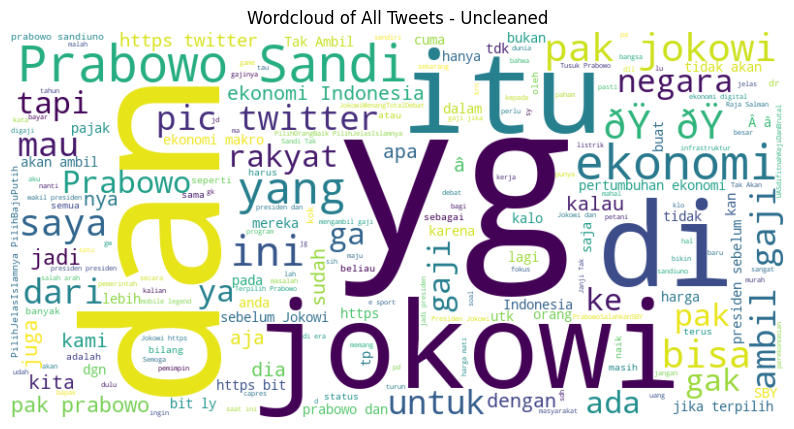

In [17]:
plot_wordcloud(" ".join(df['tweet']), title="Wordcloud of All Tweets - Uncleaned")

Full of stopwords, but both "ekonomi" and "ambil gaji" still stands out and needs to be explored before cleaning the dataset.

In [18]:
print(df.shape)
a = df[['sentimen', 'tweet']].groupby(['sentimen']).count().sort_values('tweet', ascending=False)

b = df[['sentimen', 'tweet']].query('tweet.str.contains("ekonomi", case = False)')\
        .groupby('sentimen').count()\
                .rename(columns={'tweet': 'ekonomi'})

c = df[['sentimen', 'tweet']].query('tweet.str.contains("ambil gaji", case = False)')\
        .groupby('sentimen').count()\
                .rename(columns={'tweet': 'ambil gaji'})

d = pd.concat([a, b, c], axis=1)
d

(1815, 9)


,tweet,ekonomi,ambil gaji
sentimen,,,
positif,612,247,70
netral,607,338,77
negatif,596,318,31


More than half of this dataset talks about "ekonomi" and "ambil gaji"! Let's tag that.

In [19]:
idxb = df[['sentimen', 'tweet']].query('tweet.str.contains("ekonomi", case = False)').index
idxc = df[['sentimen', 'tweet']].query('tweet.str.contains("ambil gaji", case = False)').index

df.loc[idxb, '[KEYWORD]'] = 'ekonomi'
df.loc[idxc, '[KEYWORD]'] = 'ambil gaji'
df.head(5)

,sentimen,tweet,hashtags,mentions,negations,links,[INCLUDE],[MENTION],[LINK],[KEYWORD]
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,NaN,@prabowo @rockygerung,tidak tp,https://twitter.com/mediaindonesia/status/1117...,prabowo & ~jokowi,prabowo & ~jokowi,twitterspace,NaN
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",NaN,NaN,tp,http://dlvr.it/R2pvZVÂ,jokowi & ~prabowo,NaN,link shortener,NaN
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",#01IndonesiaMaju #JokowiLagi #JokowiMenangTota...,NaN,NaN,NaN,jokowi & ~prabowo,NaN,NaN,ekonomi
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",NaN,NaN,NaN,NaN,jokowi & ~prabowo,NaN,NaN,ekonomi
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,NaN,NaN,NaN,NaN,~prabowo & ~jokowi,NaN,NaN,NaN


### Data Cleaning

The stopwords file is available at https://github.com/louisowen6/NLP_bahasa_resources/blob/master/combined_stop_words.txt, with 'alay' vocabulary available at https://drive.google.com/file/d/13dmy2DnJC6_Z0dWS9YlfgUlTNr45gKHA/view?usp=sharing by Roby Koeswojo. However, I did include some words in the stopwords, so feel free to explore more.

In [20]:
#Delete broken emojis
df['tweet'] = df['tweet'].str.replace(r'([^\x00-\x7F]+)', '', regex = True)

#Delete urls
df['tweet'] = df['tweet'].str.replace(r'(https?:\/\/\S+)', '', regex = True)
df['tweet'] = df['tweet'].str.replace(r'pic.twitter.com*', '', regex = True)

with open('combined_stop_words.txt', 'r') as f:
    stop_words = f.read().splitlines()
    stop_words = set(stop_words)
    stop_words_list = [i for i in stop_words]

stopwordslist = "|".join(stop_words_list)
df['tweet'] = df['tweet'].str.replace(stopwordslist, '', regex = True)

In [21]:
from nlp_id.lemmatizer import Lemmatizer
from nlp_id.postag import PosTag
from nlp_id.stopword import StopWord
import nltk
import re

postagger = PosTag()
stopwords = StopWord().get_stopword()
postag_sw = postagger.get_pos_tag(" ".join(stopwords))

# stopwords' tags composition
dct = {}
for word, tag in postag_sw:
    if tag not in dct.keys():
        dct[tag] = 1
    else:
        dct[tag] += 1
dct

slang_df = pd.read_csv("colloquial-indonesian-lexicon.csv")
slang_dict = slang_df.set_index('slang').to_dict(orient='dict')['formal']
custom_stopwords = [word for word, tag in postag_sw if tag in ['NEG', 'JJ', 'VB', 'FW', 'NUM']]

def normalize_slang(text):
    normal_text = []
    text = re.sub(r"[^a-z]", " ", text.lower()) # remove non alphabet
    for word in text.split(" "):
        if word in slang_dict.keys(): word = slang_dict[word] # normalize slang
        if word not in custom_stopwords: normal_text.append(word) # remove stopwords
    return " ".join(normal_text)

postagger = PosTag()
lemmatizer = Lemmatizer()

def clean(text):
    # normalize slang words
    cleaned_text = normalize_slang(text)
    phrases_tag = postagger.get_phrase_tag(cleaned_text)
    normal_text_postag = []
    for word, tag in phrases_tag:
        if tag in ['NUM', 'NUMP']:
            word = "NUM" # normalize numbers to "NUM"
        elif tag in ['VB', 'VP']:
            word = lemmatizer.lemmatize(word) # lemmatize only verbs
        normal_text_postag.append(word)
    return " ".join(normal_text_postag)

c:\Development\.venv\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DictVectorizer from version 0.22 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Development\.venv\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Development\.venv\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own ri

Referring to nlp_id's documentation and considering our use case, the custom stopwords will be the stopwords with tag:
- NEG (negation),
- JJ (adjective),
- VB (verb),
- FW (foreign word),
- NUM (numbers)

In [22]:
df['tweet'] = df.tweet.apply(clean)

In [23]:
len(stopwords), len(custom_stopwords)

(1168, 408)

### Re-check the data

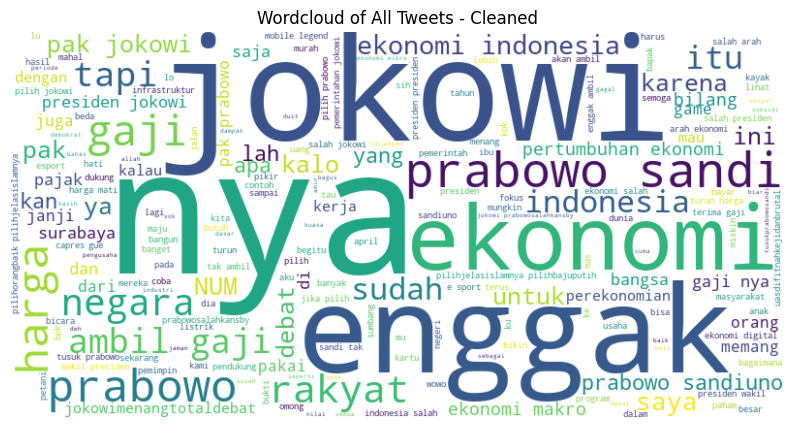

In [24]:
plot_wordcloud(" ".join(df['tweet']), title="Wordcloud of All Tweets - Cleaned")

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline

#TF-IDF, no random seed
vectorizer = TfidfVectorizer(max_features=None, ngram_range=(1, 3), max_df=0.5,\
                              min_df=2, norm='l2', sublinear_tf=True, lowercase=True, \
                                strip_accents='unicode', token_pattern=r'(?u)\b\w\w+\b')

lda = LatentDirichletAllocation(n_components=3, max_iter=500, \
                                learning_method='batch', learning_offset=10.)

lsa = make_pipeline(vectorizer, lda)

X = lsa.fit_transform(df['tweet'])

Since it's impossible to (humanly) comprehend high-dimensional data, I reduced the data into 3-dimensional data with `Latent Dirichlet Allocation` (LDA) and use `plotly` to create 3-dimensional scatterplot. LDA also clusters the data into n-topic, in this case 3 topics, by calculating its' probability values on a particular topic.

In [34]:
#After TF-IDF Vectorizer, Latent-Diriclet Allocation
data0 = pd.DataFrame(X, columns=['x', 'y', 'z'])
data0['sentimen'] = df['sentimen']
data0['tweet'] = df['tweet']
data0['negations'] = df['negations']
data0['[INCLUDE]'] = df['[INCLUDE]']
data0['[MENTION]'] = df['[MENTION]']
data0['[KEYWORD]'] = df['[KEYWORD]']
data0

,x,y,z,sentimen,tweet,negations,[INCLUDE],[MENTION],[KEYWORD]
0,0.083406,0.835718,0.080875,negatif,prabowo indonesia harga bangsa asing berita ho...,tidak tp,prabowo & ~jokowi,prabowo & ~jokowi,NaN
1,0.110902,0.778712,0.110386,netral,batuan langka tasbih jokowi hadiah habib luthf...,tp,jokowi & ~prabowo,NaN,NaN
2,0.073551,0.853360,0.073089,netral,di era jokowi ekonomi indonesia indonesiamaju ...,NaN,jokowi & ~prabowo,NaN,ekonomi
3,0.059451,0.880795,0.059754,positif,bagi sumatera selatan asian games dampak pada ...,NaN,jokowi & ~prabowo,NaN,ekonomi
4,0.066203,0.867865,0.065932,negatif,negara ngutang bangun infrastruktur sudah paka...,NaN,~prabowo & ~jokowi,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1810,0.086400,0.828194,0.085406,netral,negarawan bangga depan harga bangsa nya daulat...,NaN,~prabowo & ~jokowi,NaN,NaN
1811,0.094311,0.811152,0.094538,netral,harus ceramah damai indonesia ku perekonomian ...,NaN,~prabowo & ~jokowi,NaN,ekonomi
1812,0.080013,0.842081,0.077906,netral,mari bangun bangsa dukung perekonomian negara ...,tp,jokowi & ~prabowo,NaN,ekonomi
1813,0.092023,0.828118,0.079859,netral,bantu maju perekonomian bangsa pak jokowi yuk,tp,jokowi & ~prabowo,NaN,ekonomi


In [36]:
import plotly.express as px

#Vizualize the data
fig = px.scatter_3d(data0, x = data0['x'], y = data0['y'], z = data0['z'], \
    color = data0['sentimen'], opacity=0.7, color_discrete_sequence = ['#FF0000', '#0000FF', '#00FF00'], \
    hover_data = {
        'x': False, 'y': False, 'z': False, 'sentimen': True, 'tweet': True, 'negations': True, '[INCLUDE]': True, '[MENTION]': True, '[KEYWORD]': True
        }, 
        title='Projection for all tweets with TF-IDF Vectorizer & Latent Dirichlet Allocation (LDA)')

fig.update_layout(
    autosize = False,
    width = 1024,
    height = 768
    )

fig.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df['tweet']
y = df['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

label_enc = LabelEncoder()
y_train_enc = label_enc.fit_transform(y_train)
y_test_enc = label_enc.transform(y_test)

### Training

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input, Dense, LSTM, Bidirectional,
                                     Embedding, Dropout)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from keras_tuner.tuners import RandomSearch

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import (StratifiedKFold, GridSearchCV,
                                     RandomizedSearchCV)
from sklearn.metrics import accuracy_score, confusion_matrix

tf.random.set_seed(42)
import optuna
from gensim.models import Word2Vec
from nltk import word_tokenize

In [41]:
# functions
def tokenization(data):
    tokens = []
    for text in data:
        words = word_tokenize(text)
        tokens.append(words)
    return tokens


def get_word2vec_model(tokens, min_count=1, vector_size=100, window=5,
                       method='cbow'):
    assert method in ['cbow', 'skipgram']
    method_dict = {'cbow': 0, 'skipgram': 1}

    embedding_model = Word2Vec(tokens,
                               min_count=min_count,
                               vector_size=vector_size,
                               window=window,
                               sg=method_dict[method], seed=42, workers=1)
    return embedding_model


def get_doc_embedding(tokens, model):
    """ Averaging """
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors: return
    return sum(vectors) / len(vectors)

### Random Forest - TF-IDF

In [42]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(X)
tfidf_array = tfidf.toarray()
X_tfidf = pd.DataFrame(data=tfidf_array, columns = vectorizer.get_feature_names_out())
X_tfidf.head()

,aa,aaamiin,aagympilihpr,aagympilihprabowo,aagympilihprabowosandi,aalaikum,aamiinn,aaminnnn,aammiin,abadi,...,zon,zonk,zoriur,zp,zpno,zs,zswykszpbu,ztf,zwegn,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                                test_size=0.2,
                                                                stratify=y,
                                                                random_state=42)

In [44]:
rf = RandomForestClassifier()

param = {
    'n_estimators': [i for i in range(10, 110, 10)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None] + [i for i in range(1, 11)],
    'min_samples_split': [i for i in range(2, 11)],
    'min_samples_leaf': [i for i in range(1, 11)],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None] + [i for i in range(1, 11)],
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param,
    n_iter=300,
    cv=5,
    random_state=28,
    n_jobs=-1
)

In [45]:
random_search.fit(X_tfidf_train, y_train)

best_rf_model = random_search.best_estimator_

c:\Development\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Development\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Development\.venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Development\.venv\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Development\.venv\Lib\site-packages\sklearn\utils

In [46]:
best_params = {'n_estimators': 90,
               'min_samples_split': 10,
               'min_samples_leaf': 5,
               'max_leaf_nodes': None,
               'max_features': 'sqrt',
               'max_depth': None,
               'criterion': 'entropy'}

best_rf_model = RandomForestClassifier(**best_params)

In [47]:
best_rf_model.fit(X_tfidf_train, y_train)
y_pred_test = best_rf_model.predict(X_tfidf_test)

accuracy_test = accuracy_score(y_test, y_pred_test)

print("Best Accuracy:", accuracy_test)

Best Accuracy: 0.6170798898071626


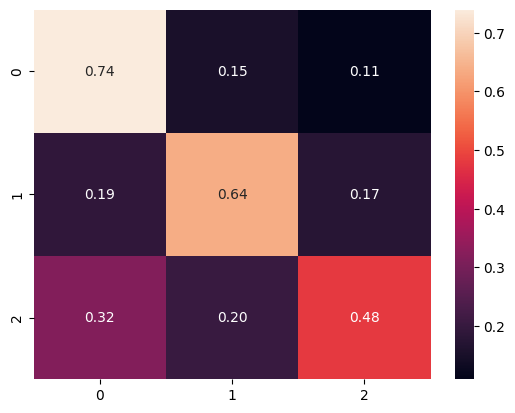

In [49]:
import numpy as np

cm = confusion_matrix(y_test, y_pred_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True, fmt='.2f',)
plt.show()

### Random Forest + Word2Vec

In [50]:
all_tokens = tokenization(X)
train_tokens = tokenization(X_train)
test_tokens = tokenization(X_test)

result = {'min_count': [], 'window': [], 'accuracy': []}

for min_count in [1, 2, 3, 4, 5]:
    for window in [2, 3, 5, 7, 8, 10]:
        sg_model = get_word2vec_model(all_tokens,
                                      min_count=min_count,
                                      window=window,
                                      method='skipgram')
        sg_model.train(all_tokens,
                    total_examples=sg_model.corpus_count,
                    epochs=sg_model.epochs)

        # get the embedded data with skipgram model
        train_data = [get_doc_embedding(tokens, sg_model) for tokens in train_tokens]
        test_data = [get_doc_embedding(tokens, sg_model) for tokens in test_tokens]

        # base RF model
        clf = RandomForestClassifier(random_state=42)
        # fit and predict
        clf.fit(train_data, y_train_enc)
        predictions = clf.predict(test_data)
        # accuracy
        accuracy = accuracy_score(y_test_enc, predictions)

        result['min_count'].append(min_count)
        result['window'].append(window)
        result['accuracy'].append(accuracy)
pd.DataFrame(result)

,min_count,window,accuracy
0,1,2,0.512397
1,1,3,0.559229
2,1,5,0.559229
3,1,7,0.556474
4,1,8,0.570248
5,1,10,0.603306
6,2,2,0.537190
7,2,3,0.537190
8,2,5,0.561983
9,2,7,0.581267


In [51]:
# vector size
train_tokens = tokenization(X_train)
test_tokens = tokenization(X_test)

result = {'min_count': [], 'window': [], 'vector_size': [],'accuracy': []}
min_count = 4
window = 7

for vector_size in [25, 50, 100, 150, 300]:
    sg_model = get_word2vec_model(all_tokens,
                                    min_count=min_count,
                                    window=window,
                                  vector_size=vector_size,
                                    method='skipgram')
    sg_model.train(all_tokens,
                total_examples=sg_model.corpus_count,
                epochs=sg_model.epochs)

    # get the embedded data with skipgram model
    train_data = [get_doc_embedding(tokens, sg_model) for tokens in train_tokens]
    test_data = [get_doc_embedding(tokens, sg_model) for tokens in test_tokens]

    # base RF model
    clf = RandomForestClassifier(random_state=42)
    # fit and predict
    clf.fit(train_data, y_train_enc)
    predictions = clf.predict(test_data)
    # accuracy
    accuracy = accuracy_score(y_test_enc, predictions)

    result['min_count'].append(min_count)
    result['window'].append(window)
    result['vector_size'].append(vector_size)
    result['accuracy'].append(accuracy)
pd.DataFrame(result)

,min_count,window,vector_size,accuracy
0,4,7,25,0.575758
1,4,7,50,0.592287
2,4,7,100,0.573003
3,4,7,150,0.578512
4,4,7,300,0.578512


In [52]:
# skipgram is better than cbow for this case
skipgram = get_word2vec_model(train_tokens,
                              min_count=4,
                              window=7,
                              vector_size=100,
                              method='skipgram')

skipgram.train(train_tokens,
               total_examples=skipgram.corpus_count,
               epochs=skipgram.epochs)

train_data = [get_doc_embedding(tokens, skipgram) for tokens in train_tokens]
test_data = [get_doc_embedding(tokens, skipgram) for tokens in test_tokens]

Hparam Tuning

In [53]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42
    }

    clf = RandomForestClassifier(**params)
    clf.fit(train_data, y_train_enc)
    predictions = clf.predict(test_data)
    accuracy = accuracy_score(y_test_enc, predictions)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_params['random_state'] = 42

[I 2024-03-18 20:01:35,457] A new study created in memory with name: no-name-0bae5a23-66c0-4f84-9f7b-e5999cf0d1d1
[I 2024-03-18 20:01:35,642] Trial 0 finished with value: 0.5013774104683195 and parameters: {'n_estimators': 5, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5013774104683195.
[I 2024-03-18 20:01:35,989] Trial 1 finished with value: 0.5895316804407713 and parameters: {'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5895316804407713.
[I 2024-03-18 20:01:36,911] Trial 2 finished with value: 0.5674931129476584 and parameters: {'n_estimators': 39, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5895316804407713.
[I 2024-03-18 20:01:37,051] Trial 3 finished with value: 0.5289256198347108 and parameters: {'n_estimators': 8, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Bes

In [54]:
best_params = {'n_estimators': 35,
               'min_samples_split': 3,
               'min_samples_leaf': 4,
               'max_features': None}

In [55]:
clf = RandomForestClassifier(**best_params)
clf.fit(train_data, y_train_enc)

# predict train data
predictions = clf.predict(train_data)
print(accuracy_score(y_train_enc, predictions))

# predict test data
predictions = clf.predict(test_data)
print(accuracy_score(y_test_enc, predictions))

0.9600550964187328
0.5785123966942148


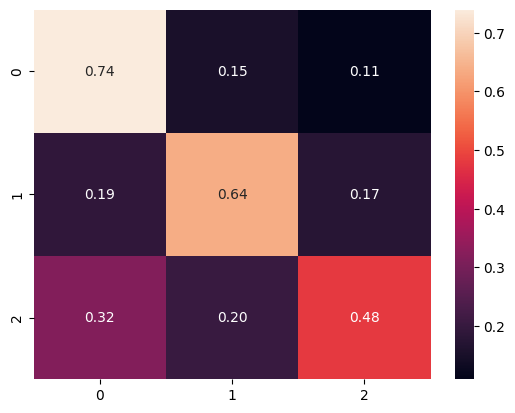

In [56]:
cm = confusion_matrix(y_test, y_pred_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f',)
plt.show()

### LSTM & TF-IDF

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

In [58]:
max_words = 5000
maxlen = tfidf_array.shape[1]

In [59]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', 32, 64, step=16), input_shape=(maxlen,))))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [60]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

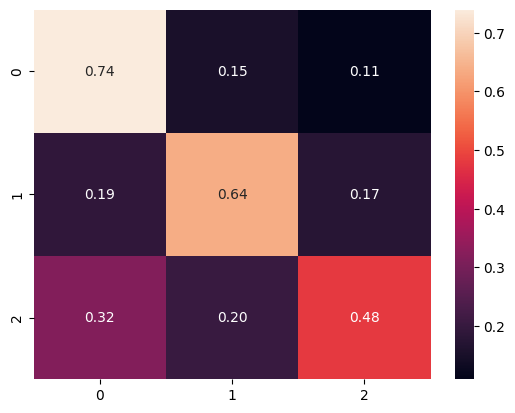

In [64]:
cm = confusion_matrix(y_test, y_pred_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True, fmt='.2f',)
plt.show()

### LSTM & TF-IDF

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

In [66]:
max_words = 5000
maxlen = tfidf_array.shape[1]

In [67]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', 32, 64, step=16), input_shape=(maxlen,))))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [68]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

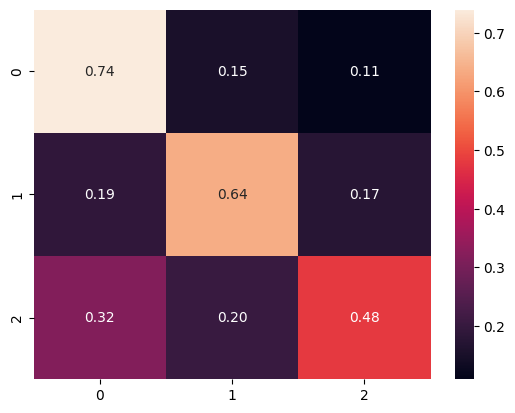

In [71]:
cm = confusion_matrix(y_test, y_pred_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True, fmt='.2f',)
plt.show()

### LSTM & Embedded Layer

In [87]:
import torch

import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.optim as optim
from tqdm.notebook import tqdm

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class TweetDataset(TensorDataset):
    def __init__(self, numpyarray):
        self.numpyarray = numpyarray

    def __len__(self):
        return len(self.numpyarray)

    def __getitem__(self, index):
        X_features = torch.Tensor(x).to(device)
        y_target = torch.Tensor(y).to(device)
        return X_features, y_target

traindataset = TweetDataset(train_data)
testdataset = TweetDataset(test_data)
print(traindataset[0])
print(testdataset[0])
print({device})

(tensor([[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [-1.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        ...,

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]]]), tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))
(tensor([[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [-1.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
      

In [116]:
train_dataloader = DataLoader(traindataset, batch_size = 32, shuffle = True)
val_dataloader = DataLoader(testdataset, batch_size = 32, shuffle = False)

In [117]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [118]:
def train_and_evaluate(train_dataloader, val_dataloader, model, criterion, optimizer, num_epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0

        for X_features, y_target in tqdm(train_dataloader):
            X_features = X_features.squeeze(-1).to(device)
            y_target = y_target.to(device)

            optimizer.zero_grad()

            outputs = model(X_features)
            _, predicted = torch.max(outputs, 1)

            loss = criterion(outputs, y_target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (predicted == y_target).sum().item()

        train_loss /= len(train_dataloader.dataset)
        train_accuracy = 100.0 * train_correct / len(train_dataloader.dataset)

        model.eval()
        val_loss = 0.0
        val_correct = 0

        with torch.no_grad():
            for X_features, y_target in tqdm(val_dataloader):
                X_features = X_features.squeeze(-1).to(device)
                y_target = y_target.to(device)

                outputs = model(X_features)
                _, predicted = torch.max(outputs, 1)

                loss = criterion(outputs, y_target)

                val_loss += loss.item()
                val_correct += (predicted == y_target).sum().item()

        val_loss /= len(val_dataloader.dataset)
        val_accuracy = 100.0 * val_correct / len(val_dataloader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")


In [120]:
#Hyperparameter for LSTM model
input_size = 9341
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 10
learning_rate = 0.001

#Model, loss function, and optimizer
model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

#Train and evaluate
train_and_evaluate(train_dataloader, val_dataloader, model, criterion, optimizer, num_epochs)

  0%|          | 0/46 [00:00<?, ?it/s]

RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 21845471232 bytes.

### BERT

In [121]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis",
                              model=model,
                              tokenizer=tokenizer)

# pre defined label index
label_index = {'LABEL_0': 'positif', 'LABEL_1': 'netral', 'LABEL_2': 'negatif'}


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [122]:
# predict
train_results = sentiment_analysis(X_train.tolist())
test_results = sentiment_analysis(X_test.tolist())

In [123]:
y_pred_train = [label_index[x['label']] for x in train_results]
y_pred_test = [label_index[x['label']] for x in test_results]

In [124]:
# evaluate
train_acc = accuracy_score(y_train.values, y_pred_train)
test_acc = accuracy_score(y_test.values, y_pred_test)
print(train_acc, test_acc)

0.5950413223140496 0.6033057851239669


In [125]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[92, 26,  1],
       [28, 80, 13],
       [42, 34, 47]], dtype=int64)

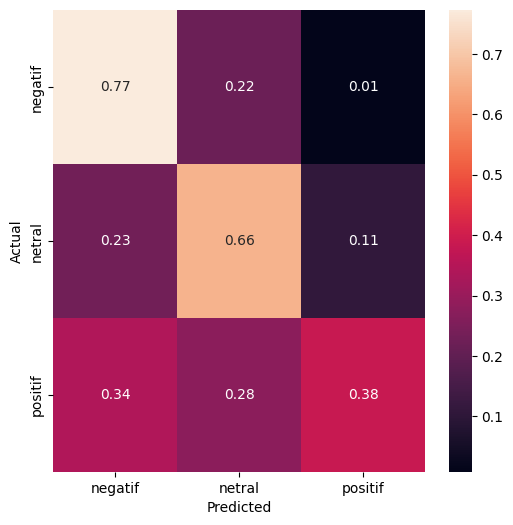

In [126]:
# visualization
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmn, annot=True, fmt='.2f',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif']
            )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [127]:
y_test.value_counts()

sentimen
positif    123
netral     121
negatif    119
Name: count, dtype: int64

## Summary

1. After trying various scenarios, the best result is using random forest model with word2vec embedding
2. All scenarios suffer from overfitting
3. In general, using Random Forest for this use case is better

4. As benchmark, the pretrained BERT model produces 63.63% validation accuracy, which means, our Random Forest + Word2vec model performs quite similar